In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"D:\excelr assignments\pca\wine.csv")

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
std_df = scaler.fit_transform(df)

In [8]:
std_df.shape

(178, 14)

K MEANS WITHOUT PCA

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
list1 = [2,3,4,5,6,7,8,9,10,11]
for i in list1:
    c1 = KMeans(n_clusters=i)
    c_labels = c1.fit_predict(std_df)
    s_score= silhouette_score(std_df,c_labels)
    print('clusters=',i,'silhoutte_score=',s_score)

clusters= 2 silhoutte_score= 0.2861665011841207
clusters= 3 silhoutte_score= 0.30648398324833453
clusters= 4 silhoutte_score= 0.2585695528003396
clusters= 5 silhoutte_score= 0.2509023797288272
clusters= 6 silhoutte_score= 0.20698551255186812
clusters= 7 silhoutte_score= 0.13451804096605843
clusters= 8 silhoutte_score= 0.13475101103427434
clusters= 9 silhoutte_score= 0.1395048304611524
clusters= 10 silhoutte_score= 0.14594784944459133
clusters= 11 silhoutte_score= 0.136336469694072


C:\Users\lokit\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

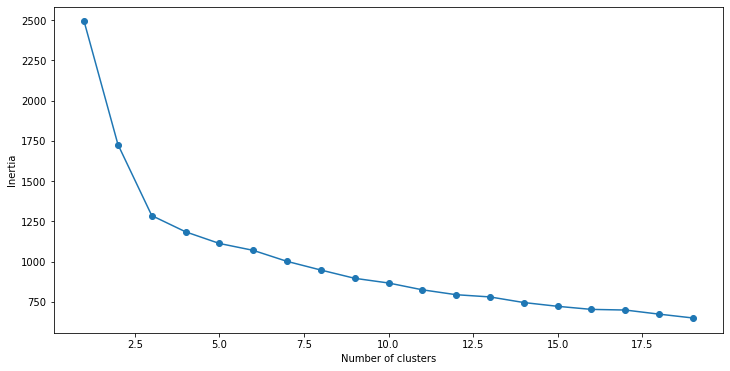

In [13]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(std_df)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [12]:
kmeans = KMeans( n_clusters = 3, init='k-means++')
kmeans.fit(std_df)
pred = kmeans.predict(std_df)

In [14]:
frame1 = pd.DataFrame(std_df)
frame1['cluster'] = pred
frame1['cluster'].value_counts()

0    67
1    62
2    49
Name: cluster, dtype: int64

HIERARCHIAL CLUSTERING WITHOUT PCA

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
list2 = [2,3,4,5,6,7,8,9,10,11]
for i in list2:
    hc = AgglomerativeClustering(n_clusters=i)
    c_labels1 = hc.fit_predict(std_df)
    s_score1= silhouette_score(std_df,c_labels1)
    print('clusters=',i,'silhoutte_score=',s_score1*100)

clusters= 2 silhoutte_score= 29.170939104255826
clusters= 3 silhoutte_score= 30.059135319645257
clusters= 4 silhoutte_score= 29.66081467614852
clusters= 5 silhoutte_score= 24.14109478484613
clusters= 6 silhoutte_score= 24.505204117446905
clusters= 7 silhoutte_score= 24.752646930736493
clusters= 8 silhoutte_score= 20.928788869678954
clusters= 9 silhoutte_score= 14.546715467259371
clusters= 10 silhoutte_score= 15.015335022014382
clusters= 11 silhoutte_score= 13.40471133315091


In [18]:
hc1 = AgglomerativeClustering(n_clusters=3)
pred2 = hc1.fit_predict(std_df)

In [19]:
frame2 = pd.DataFrame(std_df)
frame2['cluster'] = pred2
frame2['cluster'].value_counts()

0    65
2    65
1    48
Name: cluster, dtype: int64

hierarchial and K means with pcca


In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=3)

In [24]:
pca_df = pca.fit_transform(std_df)

In [27]:
list1 = [2,3,4,5,6,7,8,9,10,11]
for i in list1:
    c1 = KMeans(n_clusters=i)
    c_labels = c1.fit_predict(pca_df)
    s_score= silhouette_score(pca_df,c_labels)
    print('clusters=',i,'silhoutte_score=',s_score)

clusters= 2 silhoutte_score= 0.4204121880714807
clusters= 3 silhoutte_score= 0.48817506649357856
clusters= 4 silhoutte_score= 0.43713114001862347
clusters= 5 silhoutte_score= 0.42068307031580987
clusters= 6 silhoutte_score= 0.37914184688614944
clusters= 7 silhoutte_score= 0.3028372023785686
clusters= 8 silhoutte_score= 0.2908464366986733
clusters= 9 silhoutte_score= 0.2968900392477148
clusters= 10 silhoutte_score= 0.2856436010585209
clusters= 11 silhoutte_score= 0.3081972724969217


C:\Users\lokit\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

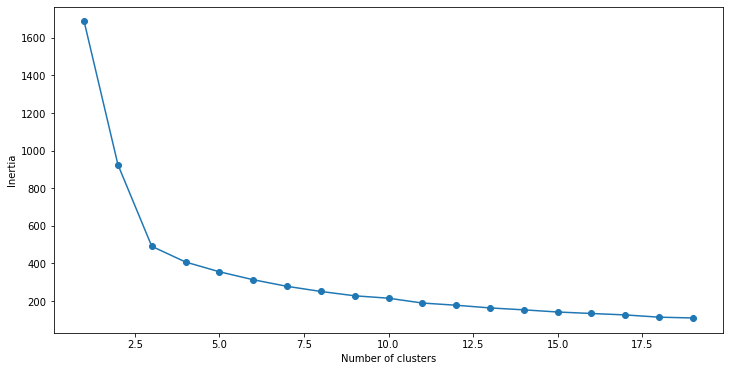

In [28]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(pca_df)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [36]:
kmeans = KMeans( n_clusters = 3, init='k-means++')
kmeans.fit(pca_df)
pred = kmeans.predict(pca_df)

In [37]:
frame3 = pd.DataFrame(pca_df)
frame3['cluster'] = pred
frame3['cluster'].value_counts()

2    67
1    62
0    49
Name: cluster, dtype: int64

In [38]:
list2 = [2,3,4,5,6,7,8,9,10,11]
for i in list2:
    hc = AgglomerativeClustering(n_clusters=i)
    c_labels1 = hc.fit_predict(pca_df)
    s_score1= silhouette_score(pca_df,c_labels1)
    print('clusters=',i,'silhoutte_score=',s_score1*100)

clusters= 2 silhoutte_score= 42.99144493427621
clusters= 3 silhoutte_score= 47.88240730180449
clusters= 4 silhoutte_score= 41.41976238570732
clusters= 5 silhoutte_score= 41.99848829826879
clusters= 6 silhoutte_score= 38.21173302711454
clusters= 7 silhoutte_score= 35.211948473620616
clusters= 8 silhoutte_score= 28.31053378841737
clusters= 9 silhoutte_score= 28.627161065857194
clusters= 10 silhoutte_score= 29.270209289548017
clusters= 11 silhoutte_score= 28.504796267430006


In [39]:
hc1 = AgglomerativeClustering(n_clusters=3)
pred2 = hc1.fit_predict(std_df)

In [40]:
frame4 = pd.DataFrame(std_df)
frame4['cluster'] = pred2
frame4['cluster'].value_counts()

0    65
2    65
1    48
Name: cluster, dtype: int64

#There is no difference in optimal number of clusters obtained from original dataframe and data fitted with principal components.
#The optimal number of clusters obtained is 3 in both the cases.
#But the quality of clusters obtained is more when principal  components are taken than normal df which is clearly evident from silhoutte scores which is .48 and .47 for kmeans and hierarchical with pca and .30 without pca